<a href="https://colab.research.google.com/github/nagavyshnavimedam/vyshu_hackthon/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv('//content/zameen-updated.csv')

In [48]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,For Sale,2.0,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3.0,5.6 Marla,For Sale,3.0,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,For Sale,5.0,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4.0,2 Kanal,For Sale,4.0,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3.0,8 Marla,For Sale,3.0,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [49]:
df.shape

(30617, 20)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30617 entries, 0 to 30616
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    30617 non-null  int64  
 1   location_id    30617 non-null  int64  
 2   page_url       30617 non-null  object 
 3   property_type  30616 non-null  object 
 4   price          30616 non-null  float64
 5   location       30616 non-null  object 
 6   city           30616 non-null  object 
 7   province_name  30616 non-null  object 
 8   latitude       30616 non-null  float64
 9   longitude      30616 non-null  float64
 10  baths          30616 non-null  float64
 11  area           30616 non-null  object 
 12  purpose        30616 non-null  object 
 13  bedrooms       30616 non-null  float64
 14  date_added     30616 non-null  object 
 15  agency         9344 non-null   object 
 16  agent          9344 non-null   object 
 17  Area Type      30616 non-null  object 
 18  Area S

In [51]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,3.061700e+04,30617.000000,3.061600e+04,30616.000000,30616.000000,30616.000000,30616.000000,30616.000000
mean,1.153165e+07,4319.959859,1.898807e+07,29.850464,71.215803,3.328194,3.437647,5.872443
std,2.060533e+06,3707.126082,3.897680e+07,3.860186,3.162862,2.176758,1.985567,5.336366
min,8.657500e+04,4.000000,1.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.028099e+07,1027.000000,2.000000e+06,24.933144,67.108169,2.000000,2.000000,3.000000
50%,1.205924e+07,3299.000000,8.500000e+06,31.462347,73.053003,3.000000,3.000000,5.000000
75%,1.311799e+07,7188.000000,2.000000e+07,33.562325,73.245320,5.000000,5.000000,8.000000
max,1.407691e+07,13769.000000,1.270000e+09,73.184088,80.161430,11.000000,18.000000,500.000000


In [52]:
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')

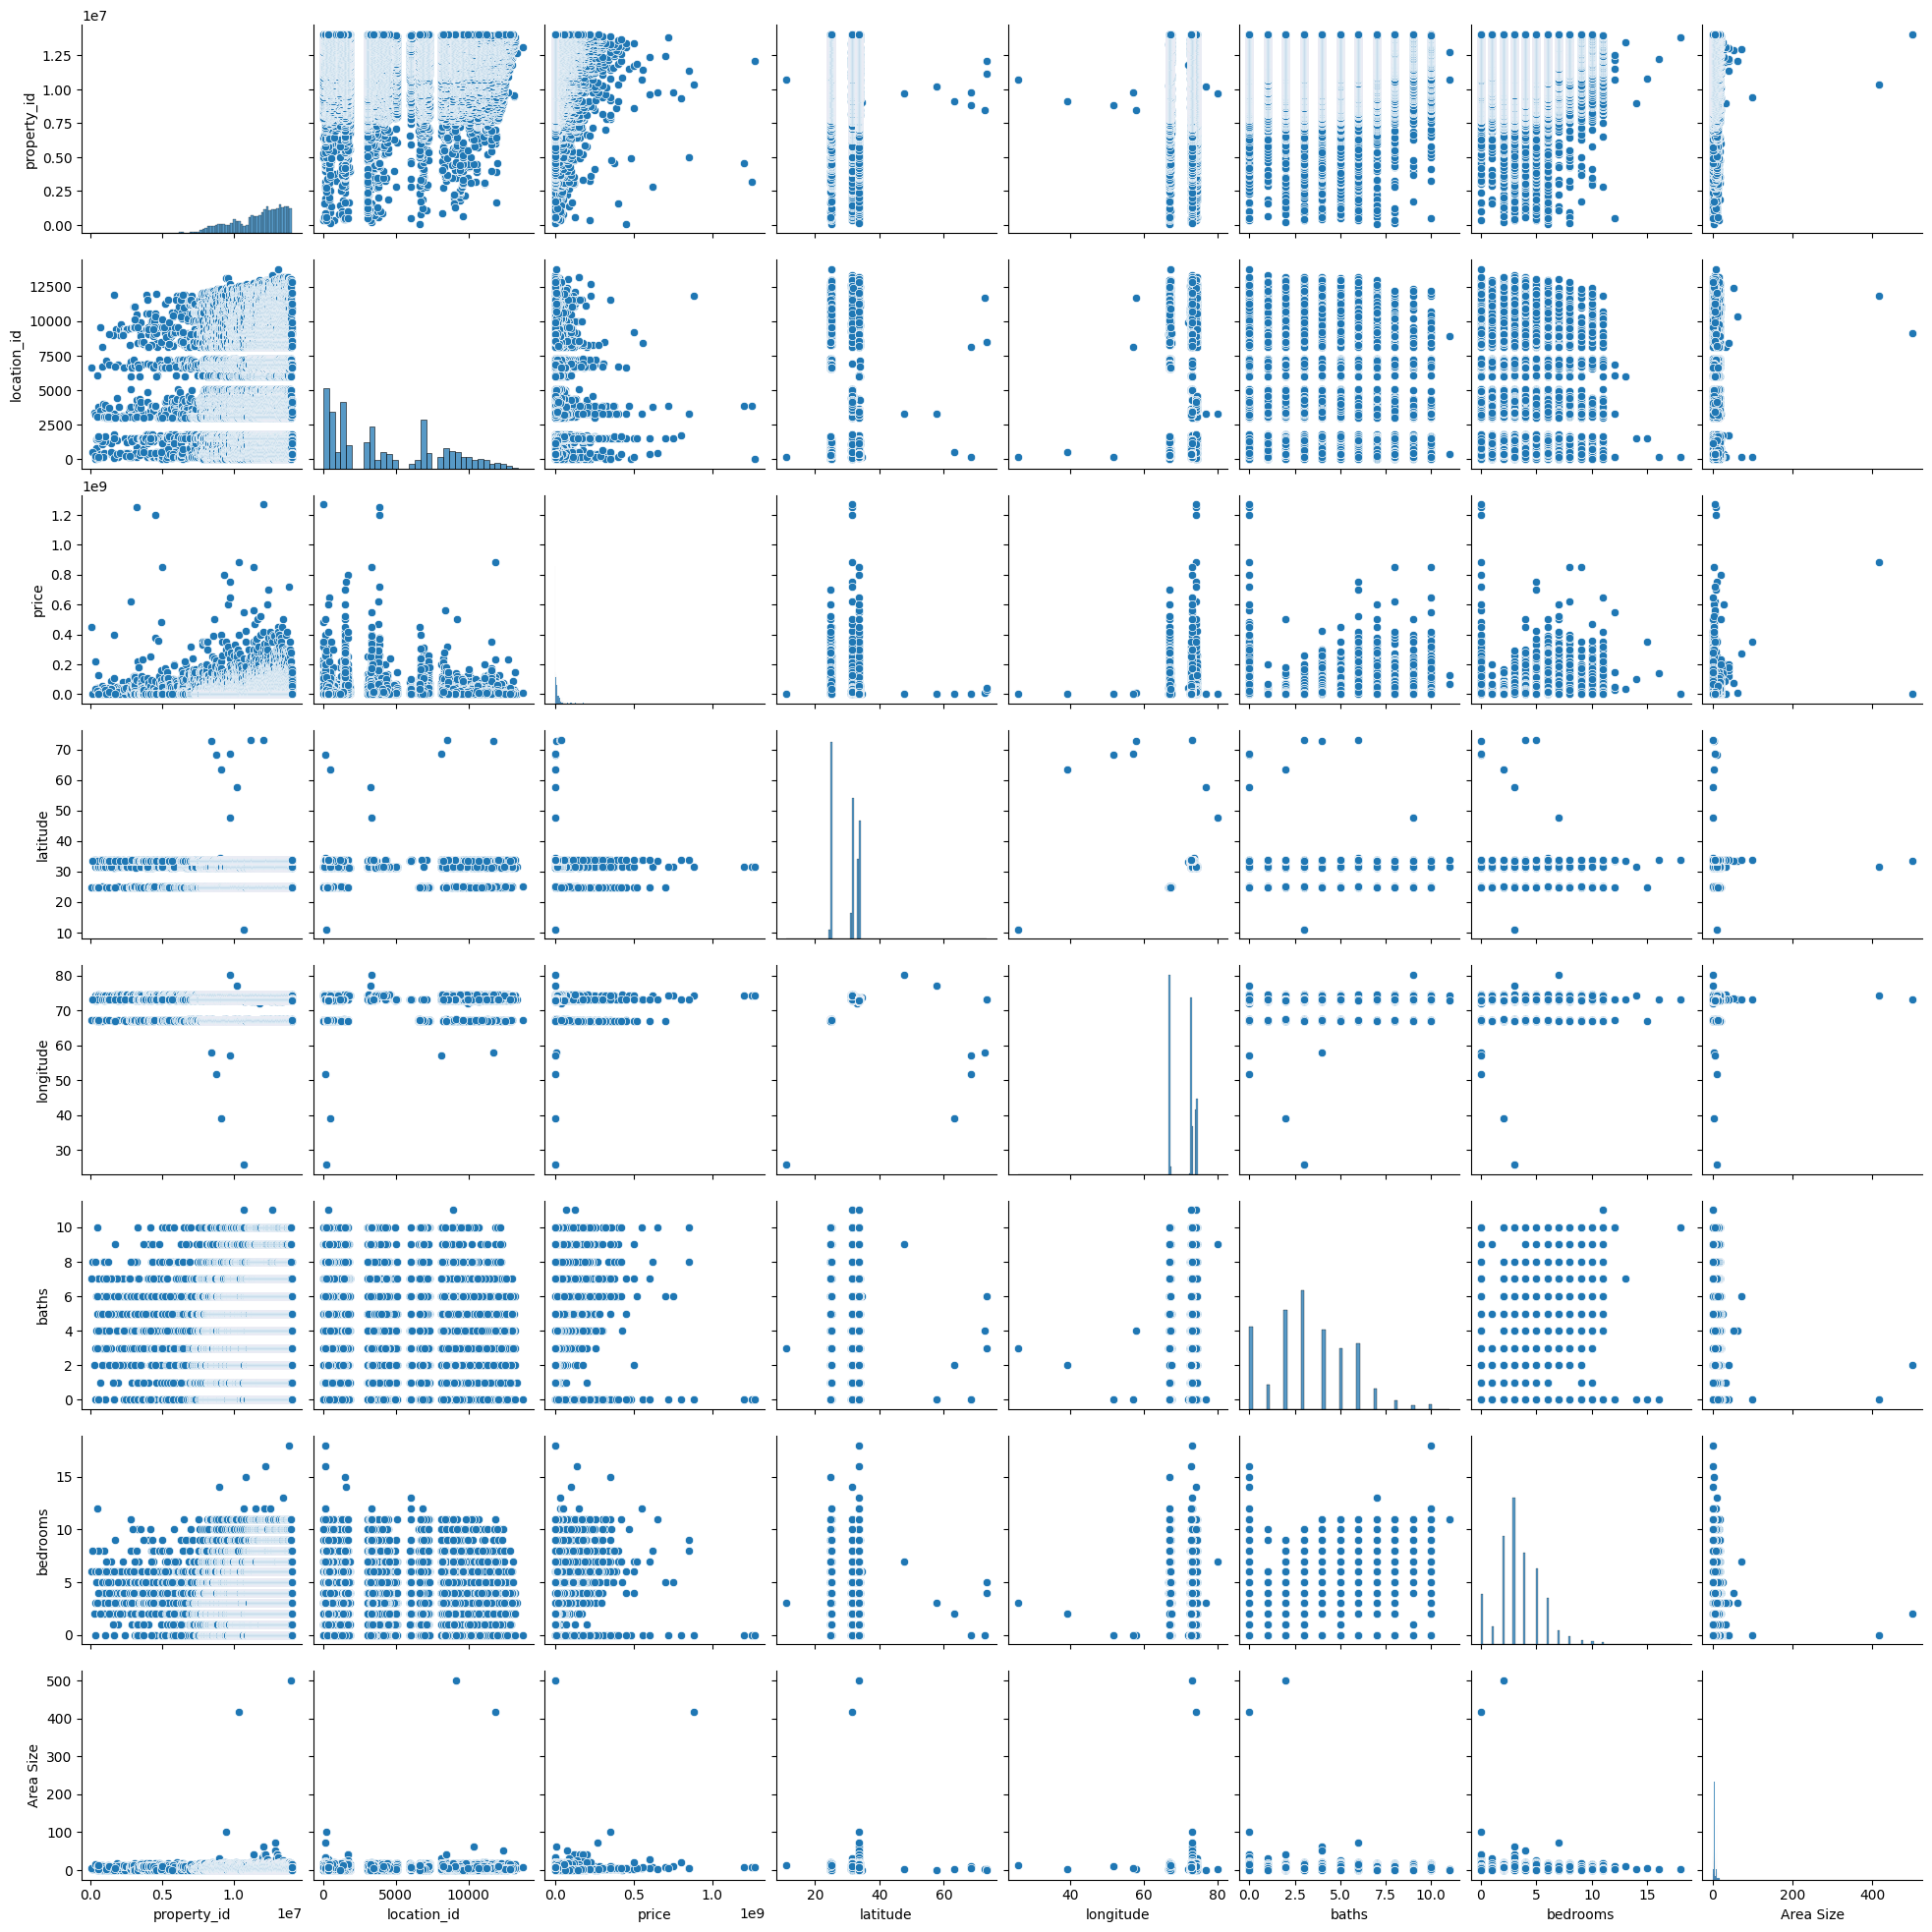

In [53]:
sns.pairplot(df)

<ipython-input-54-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

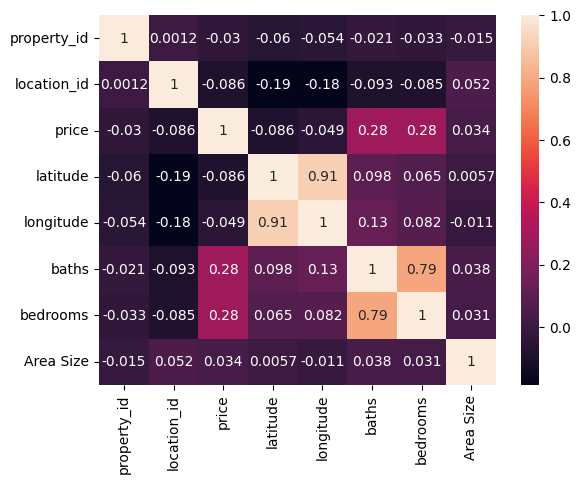

In [54]:
sns.heatmap(df.corr(),annot=True)

In [67]:
selected_features=['Area Size','area']

In [64]:
le = LabelEncoder()
df["Area Size"]=le.fit_transform(df["Area Size"])

In [68]:
le = LabelEncoder()
df["area"]=le.fit_transform(df["area"])

In [69]:
x=df[selected_features]
y=df['Area Size']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 1.0161618231169913e-27


In [43]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

In [73]:
model_SVR = svm.SVR()
model_SVR.fit(x_train,y_train)
y_pred = model_SVR.predict(x_test)
print(mean_absolute_percentage_error(y_test,y_pred))

0.004178055440664089


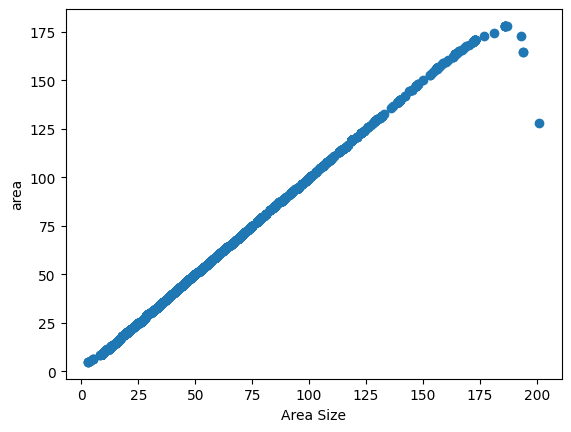

In [74]:
plt.scatter(y_test,y_pred)
plt.xlabel("Area Size")
plt.ylabel("area")
plt.show()